In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
def load_data():
    data_file = 'aircrahesFullDataUpdated_2024.csv'
    df = pd.read_csv(data_file)
    return df

In [229]:
df = load_data()

In [230]:
df.head(5)

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


# Understanding the dataset
This process helps me understand the dataset so as to know how to approach the cleaning and analysis.

In [231]:
# Display the number of rows and columns in the dataset
df.shape
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 5035
Columns: 12


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [233]:
# list the columns in the dataset
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard'],
      dtype='object')

In [234]:
# check the total number of null values in the Country/Region column
df['Country/Region'].isna().sum()

230

In [235]:
# check the total number of null values in the Operators column
df['Operator'].isna().sum()

234

### Checking the unique values in each relevant column

In [236]:
df['Location'].unique()

array(['Kainatu', 'Delhi', 'Near Basel', ...,
       'Near the Kwango River Zaire', 'Kindu Zaire', 'Ndola Zambia'],
      dtype=object)

In [237]:
df['Aircraft Manufacturer'].unique()

array(['de Havilland Canada', 'Douglas', 'Vickers Vanguard', 'Antonov',
       'Boeing', 'Airbus', 'Aero Commander', 'Britten', 'Cessna',
       'Cessna 208B Caravan', 'Hughes', 'McDonnell Douglas', 'Pilgrim',
       'Ilyushin', 'Cessna  208B Grand', 'Hawker Siddeley', 'HS', 'Avro',
       'Lockheed 14', 'Swearingen SA227AC Metroliner', 'Yakovlev',
       'Curtiss', 'Mil', 'Convair', 'Consolidated', 'Doublas',
       'Embraer 110EJ Band./Embraer 110P', 'Learjet', 'NAMC',
       'Embraer/Piper', 'Lockheed 18', 'Cams', 'Ford', 'Grumman',
       'Lockheed', 'De Havilland', 'Mi', 'Pilatus', 'Sikorsky', '??',
       'Aérospatiale', 'Bell 212FAC',
       'Hadley Page 137Jetstream I / Cessna 206N11360 /', 'Canadair',
       'Bristol Britannia', 'Fokker', 'Junkers', 'Sud Aviation',
       'Vickers Viscount', 'Avro 685 York', 'Avro Shackleton',
       'Vickers 610 Viking', 'BAC Super', 'Aerocomp Comp Air',
       'Fairchild', 'Farman', 'Dornier', 'de Havilland  Canada',
       'Aviation Traders

In [238]:
df['Country/Region'].unique()

array([nan, "'-", ' Alaska', '10', 'Afghanistan', 'Aichi', 'Alaska',
       'Algeria', 'Angola', 'Argentina', 'Australia', 'Azerbaijan',
       'Bahamas', 'Bali', 'Belgian', 'Black', 'Bolivia', 'Botswana',
       'Brazil', 'Brazil\tAmazonaves', 'British', 'Calabria',
       'California', 'Cameroon', 'Cameroons', 'Canada', 'Canary',
       'Channel', 'Chechnya', 'Chile', 'China', 'China?', 'Colombia',
       'Colorado', 'Congo', 'Croatia', 'Cyprus', 'Democratic', 'East',
       'Ecuador', 'England', 'Equatorial', 'Estonia', 'Ethiopia',
       'Finland', 'Florida', 'France', 'French', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'Guangxi', 'Guatemala',
       'Guyana', 'Hawaii', 'Honduras', 'Hong', 'Idaho', 'India',
       'India\tPawan', 'Indiana', 'Indonesia', 'Iowa', 'Iran', 'Iraq',
       'Ireland', 'Isle', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kansas',
       'Kenya', 'Laos', 'Libya', 'London', 'Madagascar', 'Malta',
       'Mexico', 'Michigan', 'Moldova'

In [239]:
df['Aircraft'].unique()

array(['de Havilland Canada DHC 6 Twin Otter 100VH', 'Douglas DC 3VT',
       'Vickers Vanguard 952G AXOP', ...,
       'Handley Page Dart Herald 2029Q CAH', 'Lockheed Hercules C 1309T',
       'Douglas DC 6BSE'], dtype=object)

### Rename the columns in the dataset

In [240]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard'],
      dtype='object')

In [241]:
# rename all columns in the dataset
df = df.rename({'Year': 'year', 
                'Quarter': 'quarter', 
                'Month': 'month', 
                'Day': 'day', 
                'Country/Region': 'country/region',
                'Aircraft Manufacturer':'aircraft manufacturer', 
                'Aircraft': 'aircraft', 
                'Location': 'location', 
                'Operator': 'operator', 
                'Ground': 'ground',
                'Fatalities (air)' :'fatalities (air)', 
                'Aboard' : 'aboard'},axis=1
              )

In [242]:
df.columns

Index(['year', 'quarter', 'month', 'day', 'country/region',
       'aircraft manufacturer', 'aircraft', 'location', 'operator', 'ground',
       'fatalities (air)', 'aboard'],
      dtype='object')

## Cleaning of the data

In [243]:
df.head(5)

,year,quarter,month,day,country/region,aircraft manufacturer,aircraft,location,operator,ground,fatalities (air),aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


### 1. Cleaning the country/region column

In [244]:
# Replace all characters with values and empty string 
df['country/region'] = df['country/region'].str.replace('N/A', 'Other Location').str.replace('?', '').str.replace("'-",'Other Location')

In [245]:
# Replace NaN with Other Location
df['country/region'] = df['country/region'].fillna('Other Location', inplace=False)

In [246]:
df['country/region'].head(10)

0    Other Location
1    Other Location
2    Other Location
3    Other Location
4    Other Location
5    Other Location
6            Alaska
7                10
8       Afghanistan
9       Afghanistan
Name: country/region, dtype: object

### 2. Cleaning the aircraft manufacturer column

In [247]:
# Replaces all characters with values and empty string as applicable
df['aircraft manufacturer'] = df['aircraft manufacturer'].str.replace('N/A', 'Other manufacturer').str.replace('?', '').str.replace('+', '')

In [248]:
# Replace NaN with Other manufacturer
df['aircraft manufacturer'] = df['aircraft manufacturer'].fillna('Other manufacturer', inplace=False)

In [249]:
df['aircraft manufacturer'].head(10)

0    de Havilland Canada
1                Douglas
2       Vickers Vanguard
3                Antonov
4                Douglas
5                Douglas
6                Douglas
7                Douglas
8                Antonov
9                Antonov
Name: aircraft manufacturer, dtype: object

### 3. Cleaning the aircraft column

In [250]:
# Replace N/A with Other Aircraft
# Replace question mark with an empty string
df['aircraft'] = df['aircraft'].str.replace('N/A', 'Other Aircraft').str.replace('?', '')

In [251]:
# Replace NaN with Other Aircraft
df['aircraft'] = df['aircraft'].fillna('Other Aircraft', inplace=False)

In [252]:
df['aircraft'].head(10)

0    de Havilland Canada DHC 6 Twin Otter 100VH
1                                Douglas DC 3VT
2                    Vickers Vanguard 952G AXOP
3                                Antonov AN 8TL
4                           Douglas C 47A FZ559
5                                  Douglas DC 4
6                Douglas C-54D Skymaster N3054V
7                              Douglas DC 7 / F
8                                 Antonov AN 26
9                                 Antonov AN 26
Name: aircraft, dtype: object

### 4. Cleaning the location column

In [253]:
# Replace question mark with an empty string
df['location'] = df['location'].str.replace('?', '')

In [254]:
# Replace NaN with Others
df['location'] = df['location'].fillna('Others', inplace=False)

In [255]:
df['location'].head(10)

0                            Kainatu
1                              Delhi
2                         Near Basel
3                            Pepa  -
4                      Pindi-Khut  -
5                           Taipei -
6                     Near Fairbanks
7                      Near Sloan 10
8            Near Konduz Afghanistan
9    Near Mazâr-e Charif Afghanistan
Name: location, dtype: object

### 5. Cleaning the operator column

In [256]:
# Replace question mark with an empty string
# Replace N/A with 'Other operator'
# Trim white spaces
df['operator'] = df['operator'].str.replace('?', '').str.replace('N/A', 'Other operator').str.strip()

In [257]:
# Replace NaN with Other operator
df['operator'] = df['operator'].fillna('Other operator', inplace=False)

In [258]:
df['operator'].head(10)

0                   Airlines Australia GuineaTrans New
1                                  Airways IndiaDeccan
2       (UK) Airlines International SwitzerlandInvicta
3                               Airlines Centrafricain
4                                      Force Air Royal
5                                 Force Air Thai Royal
6                                      Alaska Air Fuel
7    Nevada      Vegas Las of SW miles United Air L...
8               Force Air Republican Afghan - Military
9               Force Air Republican Afghan - Military
Name: operator, dtype: object

In [259]:
df.info() # This shows that all issues in the dataset have been attended to

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   5035 non-null   int64 
 1   quarter                5035 non-null   object
 2   month                  5035 non-null   object
 3   day                    5035 non-null   int64 
 4   country/region         5035 non-null   object
 5   aircraft manufacturer  5035 non-null   object
 6   aircraft               5035 non-null   object
 7   location               5035 non-null   object
 8   operator               5035 non-null   object
 9   ground                 5035 non-null   int64 
 10  fatalities (air)       5035 non-null   int64 
 11  aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [260]:
df.isna().sum() # This shows that there is NaN values anymore in the dataset

year                     0
quarter                  0
month                    0
day                      0
country/region           0
aircraft manufacturer    0
aircraft                 0
location                 0
operator                 0
ground                   0
fatalities (air)         0
aboard                   0
dtype: int64

In [261]:
df.head()

,year,quarter,month,day,country/region,aircraft manufacturer,aircraft,location,operator,ground,fatalities (air),aboard
0,1970,Qtr 2,April,28,Other Location,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,Other Location,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,Other Location,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,Other Location,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,Other Location,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


# RESEARCH QUESTIONS

1. What is the total monthly aircrashes that occured from 1908 to 2024?
2. Which quarter of the year has the highest number of aircraft crashes?
3. What is the highest number of fatalities on the ground?
4. What is the highest Number of fatalities on the aircraft?
5. What is the highest number of people aboard the aircraft?
6. Which 5 aircraft models have the highest number of ground fatalities?

# Findings

### 1. What is the total monthly aircrashes that occured from 1908 to 2024?

In [262]:
mothly_aircrashes = df.groupby('month')['fatalities (air)'].count()

In [263]:
mothly_aircrashes

month
April        350
August       452
December     497
February     362
January      467
July         428
June         367
March        427
May          361
November     443
October      428
September    453
Name: fatalities (air), dtype: int64

In [264]:
Months = df['month']
Aircrashes = df['fatalities (air)']

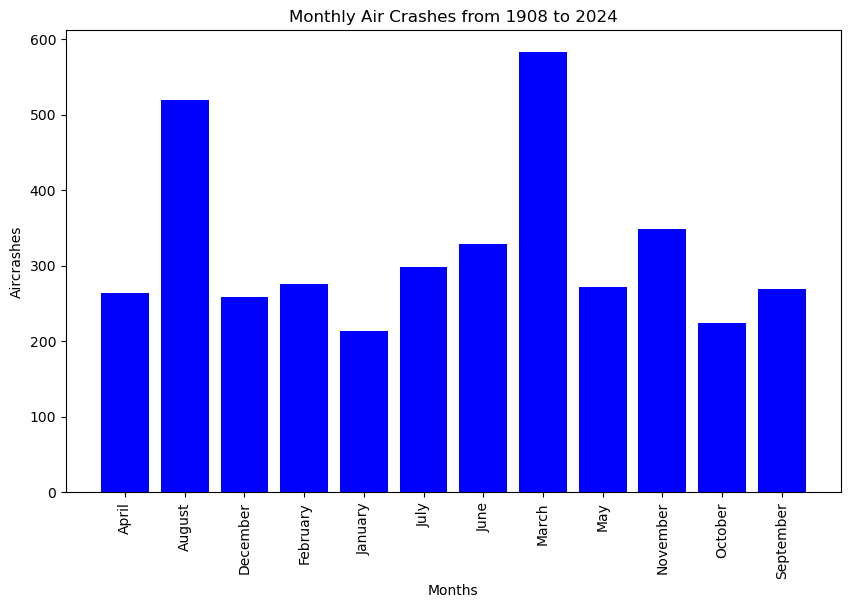

In [276]:
# generates a bar chart visualization
plt.figure(figsize=(10,6))
plt.bar(Months,Aircrashes, color = 'blue')
plt.title('Monthly Air Crashes from 1908 to 2024')
plt.xlabel('Months')
plt.ylabel('Aircrashes')
plt.xticks(rotation=90)
plt.show()

### 2. Which quarter of the year has the highest number of aircraft crashes?

In [266]:
aircrashes_per_quarter = df.groupby('quarter')['fatalities (air)'].count()
aircrashes_per_quarter

quarter
Qtr 1    1256
Qtr 2    1078
Qtr 3    1333
Qtr 4    1368
Name: fatalities (air), dtype: int64

In [267]:
qtr_name = aircrashes_per_quarter.idxmax() 
qtr_count = aircrashes_per_quarter.max()
print(f"qtr_with_highest_aircrashes: {qtr_name}, with {qtr_count} aircraft crashes")

qtr_with_highest_aircrashes: Qtr 4, with 1368 aircraft crashes


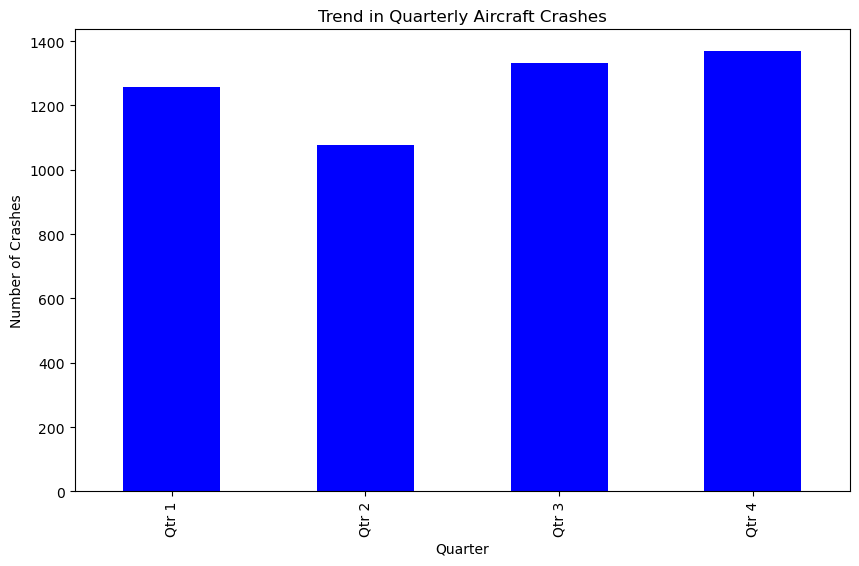

In [277]:
# generates a horizontal bar chart visualization
plt.figure(figsize=(10, 6))
aircrashes_per_quarter.plot.bar(x='quarter', y = 'fatalities (air)', color='blue')
plt.title('Trend in Quarterly Aircraft Crashes')
plt.xlabel('Quarter')
plt.ylabel('Number of Crashes')
plt.show()

### 3. What is the highest number of fatalities on the ground?

In [269]:
highest_ground_fatalities = df['ground'].max()
highest_ground_fatalities

2750

### 4. What is the highest Number of fatalities on the aircraft?

In [270]:
highest_air_fatalities = df['fatalities (air)'].max()
highest_air_fatalities

583

### 5. What is the highest number of people aboard the aircraft?

In [271]:
highest_no_aboard = df['aboard'].max()
highest_no_aboard

644

### 6. Which 5 aircraft models have the highest number of ground fatalities?

In [272]:
aircraft_model = df.groupby('aircraft')['ground'].count().reset_index()

In [273]:
aircraft_model_sorted = aircraft_model.sort_values(by = 'ground', ascending = False).head(5)

In [274]:
aircraft_model_sorted

,aircraft,ground
652,Boeing B 737,73
650,Boeing B 727,57
646,Boeing B 707,51
2733,McDonnell Douglas DC 9,42
1247,Douglas C 47A,40


<Figure size 1000x600 with 0 Axes>

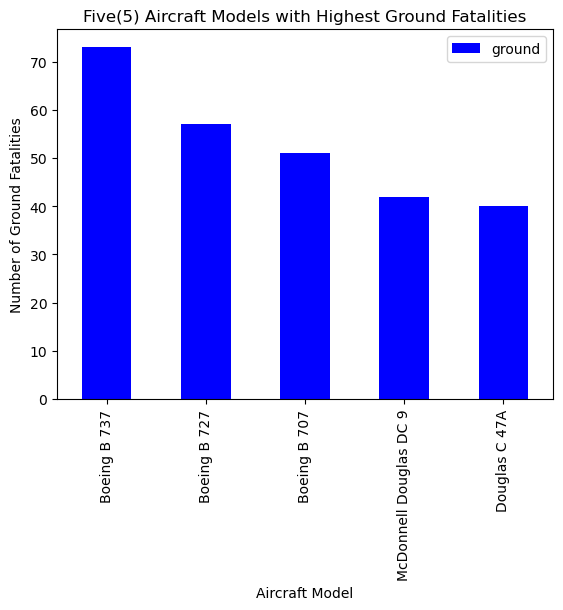

In [275]:
plt.figure(figsize=(10,6))
aircraft_model_sorted.plot.bar(x = 'aircraft', y = 'ground', color = 'blue')
plt.title('Five(5) Aircraft Models with Highest Ground Fatalities')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Ground Fatalities')
plt.xticks(rotation=90)
plt.show()

# Recommendation

Recommendation:

According to the trends and patterns identified in the analysis above, aviation safety has significantly improved over the years perhaps due to technology advancement, regulation, and safety roadmap. Although, some span of the year certain aircraft manufacturers show lofty incidences of crashes and fatalities. Due to this action it is recommended that safety protocols are enforced during quarters with prominent fatality, and manufacturers with track records of poor safety protocols should be strictly watched and reconsidered. In addition, very high fatality incidents are often linked to aircraft with larger passenger capacities, so accurate safety standards should be pressed on these models to lessen future risks.